# Evaluating the machine learning model/estimator:

### Three possible ways:
    1. Estimators built-in `score()` method.
    2. The `scoring` parameter
    3. Problem-specific metric functions

https://scikit-learn.org/stable/modules/model_evaluation.html

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [50]:
dataset = pd.read_csv("heart-disease.csv")
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [51]:
X = dataset.drop("target", axis=1)
y = dataset["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
clf.score(X_test, y_test)

0.7213114754098361

### K-Fold cross validation

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
dataset = pd.read_csv("heart-disease.csv")

X = dataset.drop("target", axis=1)
y = dataset["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
cross_val_score(clf, X, y, cv=5)

array([0.83606557, 0.86885246, 0.81967213, 0.81666667, 0.8       ])

# Area under the curve (AUC/ROC)
* Area under curve (AUC)
* ROC curve

### ROC curves are a comparision of a model's true positive rate versus its false positive rate
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [56]:
from sklearn.metrics import roc_curve

dataset = pd.read_csv("heart-disease.csv")

X = dataset.drop("target", axis=1)
y = dataset["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.56, 0.44],
       [0.85, 0.15],
       [0.08, 0.92],
       [0.18, 0.82],
       [0.67, 0.33],
       [0.29, 0.71],
       [0.41, 0.59],
       [0.84, 0.16],
       [0.01, 0.99],
       [0.14, 0.86]])

In [57]:
y_prob_pos = y_probs[:, 1]
y_prob_pos[:10]

array([0.44, 0.15, 0.92, 0.82, 0.33, 0.71, 0.59, 0.16, 0.99, 0.86])

In [58]:
fpr, tpr, threshold = roc_curve(y_test, y_prob_pos)
fpr

array([0.        , 0.        , 0.        , 0.03030303, 0.03030303,
       0.03030303, 0.06060606, 0.12121212, 0.12121212, 0.12121212,
       0.18181818, 0.21212121, 0.21212121, 0.24242424, 0.24242424,
       0.3030303 , 0.3030303 , 0.33333333, 0.33333333, 0.36363636,
       0.39393939, 0.42424242, 0.48484848, 0.51515152, 0.51515152,
       0.57575758, 0.63636364, 0.6969697 , 0.72727273, 0.75757576,
       0.87878788, 0.93939394, 1.        ])

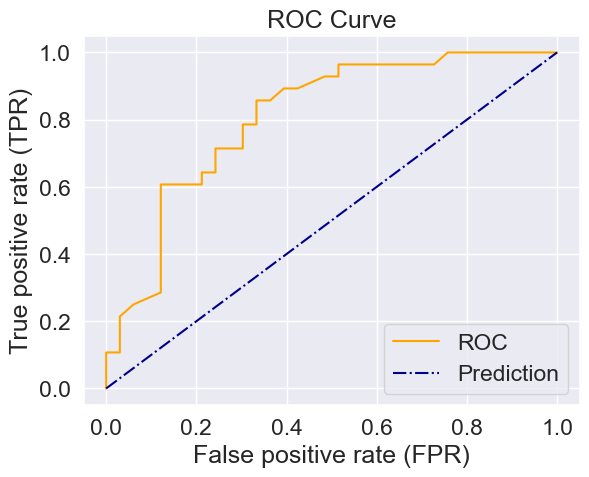

In [59]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")

    # Plot line with predictions
    plt.plot([0,1], [0,1], color="darkblue", label="Prediction", linestyle="-.")

    # Customize plot
    plt.xlabel("False positive rate (FPR)")
    plt.ylabel("True positive rate (TPR)")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [60]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_prob_pos)

np.float64(0.8079004329004329)

# Confusion Matix

#### A way to compare the labels the model predict and the actual labels it was supposed to predict

Gives you an idea where model gets confused

In [61]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[25,  8],
       [ 8, 20]])

In [62]:
# Visualizing it using pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,25,8
1,8,20


In [63]:
# Visualizing it using Seaborn's heatmap
import seaborn as sns

<Axes: >

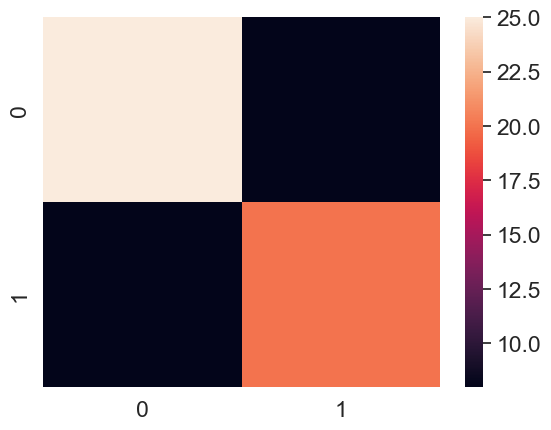

In [64]:
sns.set(font_scale=1.5)

matrix = confusion_matrix(y_test, y_preds)

sns.heatmap(matrix)

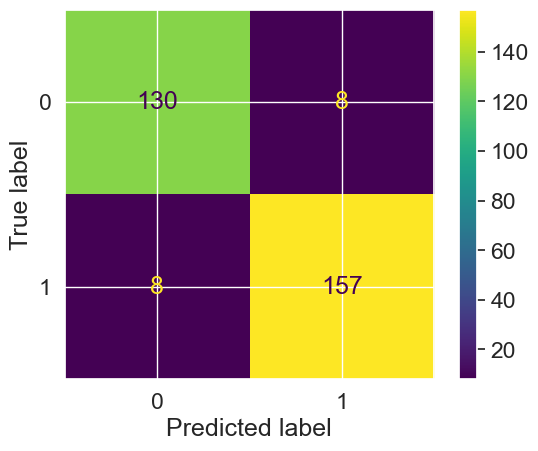

In [65]:
# Visualizng using the ConfusionMatrixDisplay

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

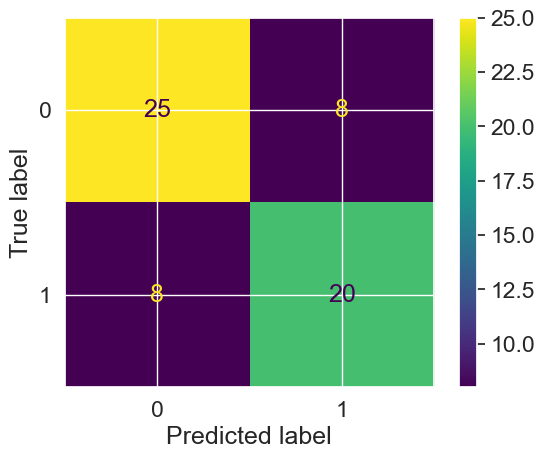

In [67]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)